<a href="https://colab.research.google.com/github/Kilvia/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn import model_selection

In [3]:
print(tf.__version__)

2.9.2


### GPU Setting

In [ ]:
# Select GPU 
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
# Runtime type needs to be GPU
physical_devices = tf.config.list_physical_devices('GPU')
print('Num_GPUs:{}, List:{}'.format(len(physical_devices), physical_devices))

Num_GPUs:1, List:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Load Data, Model Build and Training

In [5]:
# Download MNIST dataset
mnist = tf.keras.datasets.mnist

In [6]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split train in to train and valid set
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
# Check data shape
print(f"x train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x valid: {x_valid.shape}, y_valid: {y_valid.shape}")
print(f"x test: {x_test.shape}, y_test: {y_test.shape}")

x train: (48000, 28, 28), y_train: (48000,)
x valid: (12000, 28, 28), y_valid: (12000,)
x test: (10000, 28, 28), y_test: (10000,)


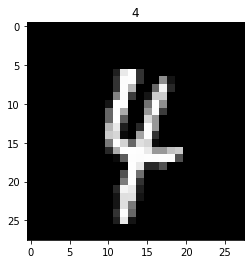

In [8]:
# Data visualization
plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])
plt.show()

In [9]:
# Rescale data to be in range of 0-1
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

### Model

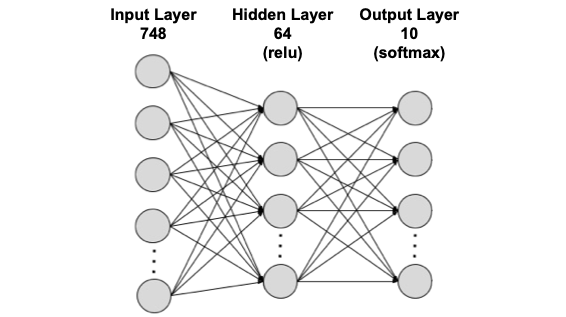

* Loss = Sparse Categorical Cross Entropy
* Optimizer = Adam
* Learning Rate = 0.001

In [10]:
def create_seq_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  return model

In [11]:
model = create_seq_model()

### Training / Validation

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.3275 - accuracy: 0.9077 - val_loss: 0.2007 - val_accuracy: 0.9437
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1610 - accuracy: 0.9523 - val_loss: 0.1499 - val_accuracy: 0.9552
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1164 - accuracy: 0.9647 - val_loss: 0.1289 - val_accuracy: 0.9621
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0912 - accuracy: 0.9732 - val_loss: 0.1209 - val_accuracy: 0.9622
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0748 - accuracy: 0.9781 - val_loss: 0.1251 - val_accuracy: 0.9612
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9808 - val_loss: 0.1118 - val_accuracy: 0.9666
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.1110 - val_accuracy:

### Visualization

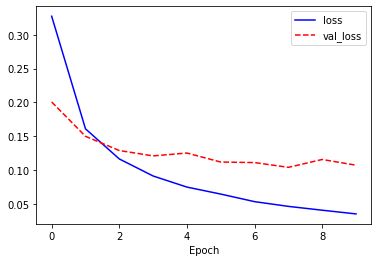

In [15]:
# Plot losses
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

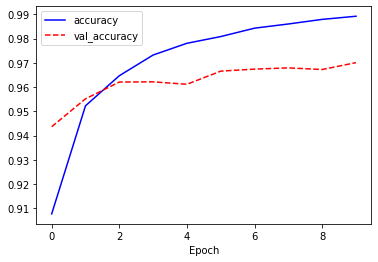

In [16]:
# Plot accuracy
plt.plot(hist.history['accuracy'], 'b-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Model Evaluation

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9736


[0.09088975936174393, 0.9735999703407288]